# 7. [Asteroseismology] periodogram

astropy implementation

In [37]:
from astropy.stats import LombScargle
import astropy.units as u
from lightkurve import KeplerLightCurveFile
import matplotlib.pyplot as plt
import numpy as np

In [115]:
for q in np.arange(1,18):
    if q==1:
        lc = KeplerLightCurveFile.from_archive('8006161', quarter=q).PDCSAP_FLUX.remove_nans().normalize()
    else:
        lc = lc.append(KeplerLightCurveFile.from_archive('8006161', quarter=q).PDCSAP_FLUX.remove_nans().normalize())

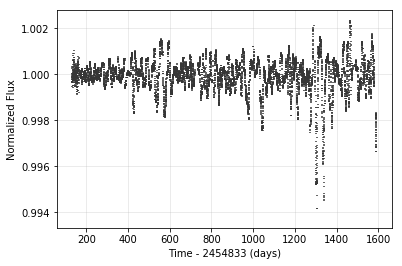

In [120]:
lc.plot()

In [127]:
LS = LombScargle((lc.time*u.day).to(u.second), lc.flux, lc.flux.max()-lc.flux.min(), nterms=1)
frequency, power = LS.autopower(maximum_frequency=(4000*u.microHertz).to(u.Hz), minimum_frequency=(1*u.microHertz).to(u.Hz))

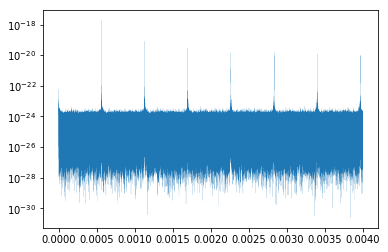

In [128]:
plt.plot(frequency, power, lw=0.1)
plt.yscale('log')